In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
get_ipython().magic('matplotlib inline')
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

In [2]:
import bone
reload(bone)

class CRCDiffAnalysis(bone.IBDAnalysis):

    def __init__(self):
        bone.IBDAnalysis.__init__(self)

    def getColonGEOPurged(self, tn=1, ta=0, tb=0):
        self.prepareData("CRC145")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'A', 'C']
        ahash = {'Normal':0, 'Adenoma':1, 'Carcinoma':2}
        if (tn == 2):
            atypes = ['N', 'C']
            ahash = {'Normal':0, 'Carcinoma':1}
        self.initData(atype, atypes, ahash)
        return
    
    
    def getQu2016(self, tn=1, ta=0, tb=0):
        self.prepareData("PLP50")
        atype = self.h.getSurvName("c tissue type")
        atypes = ['NS', 'NC', 'A', 'C', 'M']
        ahash = {'Metastasis':4, 'Carcinoma':3,'Normal crypt epithelium':1,
                'Adenoma':2,'Normal surface epithelium':0}
        if (tn == 2):
            atypes = ['NA', 'C']
            ahash = {'Metastasis':1,'Carcinoma':1,'Normal crypt epithelium':0,
                    'Adenoma':0,'Normal surface epithelium':0}
        if (tn == 3):
            atypes = ['N', 'C']
            ahash = {'Carcinoma':1,'Normal crypt epithelium':0}
        self.initData(atype, atypes, ahash)
        return

    def getTCGACRC(self, tn=1):
        self.prepareData("CRC80")
        atype = self.h.getSurvName('c Histology')
        atypes = ['N', 'PT', 'RT', 'M']
        ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0, 'Metastatic':3,
                'Recurrent Tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Primary Tumor':1, 'Solid Tissue Normal':0}
        self.initData(atype, atypes, ahash)
        return



    def getSkrzypczak2010(self, tn=1):
        self.prepareData("CRC137.2")
        atype = self.h.getSurvName('c tissue')
        atypes = ['N', 'A', 'C', 'AC']
        ahash = {'adenoma':1, 'adenocarcinoma':3, 'normal colon':0, 'colon tumor':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'normal colon':0, 'adenocarcinoma':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getParedes2020CRC(self, tn=1, tb=0):
        self.prepareData("CRC148")
        atype = self.h.getSurvName('c individual')
        atype = [re.sub("_.*", "", str(k)) for k in atype]
        ahash = {'Caucasian':0, 'AfricanAmerican':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName('c tissue')
        atype = [re.sub(" .*", "", str(k)) for k in atype]
        atypes = ['N', 'T']
        ahash = {'Tumor':1, 'Adjacent':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = [atype[i] if tval[i] == tb
                    else None for i in range(len(atype))]
        if (tn == 3):
            atypes = ['C', 'AA']
            atype = tval
            ahash = {0:0, 1:1}
            atype = [atype[i] if aval[i] == tb
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getSole2014(self, tn=1):
        self.prepareData("CRC149")
        atype = self.h.getSurvName('c sample type')
        atypes = ['N', 'T', 'M']
        ahash = {'Normal':0, 'Tumor':1, 'Mucosa':2}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'Normal':0, 'Tumor':1}
        self.initData(atype, atypes, ahash)
        return
    

    def getChen2016(self, tn=1, tb=0):
        self.prepareData("CRC154")
        atype = self.h.getSurvName('c src1')
        atypes = ['N', 'I', 'II', 'III', 'IV']
        ahash = {'CRC_FFPE_stage III':3, 'CRC_FFPE_stage II':2,
                 'CRC_FFPE_stage IV':4, 'CRC_FFPE_stage I':1,
                 'CRC_FFPE_healthy control':0}
        if (tn == 2):
            atypes = ['N', 'T']
            ahash = {'CRC_FFPE_stage III':1, 'CRC_FFPE_stage II':1,
                     'CRC_FFPE_stage IV':1, 'CRC_FFPE_stage I':1,
                     'CRC_FFPE_healthy control':0}
        self.initData(atype, atypes, ahash)
        return



In [3]:
cfile = "/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-res.txt"
nodes, edges = bone.BIGraph.readEqGraph(cfile)
df = bone.BIGraph.pruneEqGraph(edges)
# df.to_csv("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-eq.txt", sep="\t", header=False, index=False)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df, 0.7)
# bone.BIGraph.saveClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt", cls)
cls = bone.BIGraph.readClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt")
cfile = "/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
# cg.to_csv("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-eq-g.txt", sep="\t", header=False, index=False)
edges, clusters, nodep = bone.BIGraph.readClustersGraphFile("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1")
clusters[nodep['PRKAB1']]


285706 edges Processed
[0.44072559214353313, 3614.470274119544, -0.05927440785646687, 0.9407255921435331]48604860 4860 4860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 4860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 48604860 4860 4860 48604860 48604860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 486048604860 48604860 4860 4860 48604860 48604860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 4860 48604860 4860 4860 48604860 4860 48604860 4860 4860 4860 4860 4860
4263 Processed
Processing edges...
492905 edges processed


['PRKAB1']

In [4]:
def clusterNodes(edges, nodes):
    from networkx.utils.union_find import UnionFind as UF
    x = UF()
    for k in nodes:
        if k in edges:
            if "5" in edges[k]:
                for l in edges[k]["5"]:
                    x.union(k, l)
    cls = {}
    for k in x:
        p = x[k]
        if (p not in cls):
            cls[p] = []
        cls[p].append(k)
    cls1 = {}
    for k in cls:
        lh = {}
        s1 = set(cls[k])
        for l in s1:
            lh[l] = 1
        s2 = []
        for l in s1:
            if l not in edges:
                break;
            if "5" not in edges[l]:
                break;
            lh[l] = len(set(edges[l]["5"]).intersection(s1))
            if lh[l] > 0:
                s2.append(l)
        #print([ (k,lh[k]) for k in sorted(s1, key=lambda k: -lh[k])])
        cls1[k] = sorted(s1, key=lambda k: -lh[k])
    return cls1

def searchDeep(edges, start, n = 8, term = "PRKAB1", et='2'):
    import queue
    lQ = queue.Queue()
    depth = {}
    visited = {}
    cls2 = {}
    parent = {}
    if et not in edges[start]:
        return cls2, cls2, parent
    nodes = edges[start][et]
    #nodes = {k:v for i in edges[start] for k,v in edges[start][i].items()}
    cls = clusterNodes(edges, nodes)
    for k in cls:
        #print(cls[k][0], len(cls[k]), "PRKAB1" in cls[k])
        cls2[cls[k][0]] = cls[k]
        lQ.put(cls[k][0])
        depth[cls[k][0]] = 1
        parent[cls[k][0]] = start
    while (not lQ.empty()):
        l = lQ.get()
        if l in visited:
            continue;
        visited[l] = 1
        if depth[l] > n:
            continue;
        if l not in edges:
            continue;
        if et not in edges[l]:
            continue;
        ns = edges[l][et]
        #ns = {k:v for i in edges[l] for k,v in edges[l][i].items()}
        cls = clusterNodes(edges, ns)
        for k in cls:
            if cls[k][0] not in depth:
                #print(cls[k][0], len(cls[k]), depth[l]+1, "PRKAB1" in cls[k])
                cls2[cls[k][0]] = cls[k]
                lQ.put(cls[k][0])
                depth[cls[k][0]] = depth[l] + 1
                parent[cls[k][0]] = l

    cls3 = {}
    for k in cls2:
        print("A", k, len(cls2[k]), depth[k], parent[k], term in cls2[k])
        for l in cls2[k]:
            cls3[l] = 1

    cls = clusterNodes(edges, cls3)
    for k in cls:
        print("B", cls[k][0], len(cls[k]), term in cls[k])
    
    return cls2, cls3, parent

cls2, cls3, parent = searchDeep(edges, "CDX2", 2, nodep["PRKAB1"])

"GPD1L" in cls2['KCTD5']

cls = clusterNodes(edges, edges['GPD1L']['4'])
cls2[cls['IGFBP3'][0]] = cls['IGFBP3']
print ('A', cls['IGFBP3'][0], len(cls2[cls['IGFBP3'][0]]), 1, 'KCTD5', 'CCDC88A' in cls2[cls['IGFBP3'][0]])


A MGAT4B 21 1 CDX2 False
A EPB41L4B 21 1 CDX2 True
A KCTD5 186 2 MGAT4B True
A MUPCDH 3 2 MGAT4B False
A ABCC13 2 2 EPB41L4B False
A PSPC1 391 3 KCTD5 False
A FUCA1 108 3 MUPCDH False
A SCNN1B 37 3 ABCC13 False
B YEATS4 1890 True
A LAYN 291 1 KCTD5 True


In [15]:

# node1:CDX2,
# node2: ERBB2 or MGAT4B, both are equivalent to each other
print("ERBB2" in cls2["MGAT4B"])
# node3: PRKAB1 or EPB41L4B, both are equivalent to each other
print("PRKAB1" in cls2["EPB41L4B"])
# node4: KCTD5 or CDH1;PRKAB1, both are equivalent to each other
print("PRKAB1" in cls2["KCTD5"])
print("CDH1" in cls2["KCTD5"])
# node5: MUPCDH
# node6: ABCC13 or UGT1A6,both are equivalent to each other
print("UGT1A6" in cls2["ABCC13"])
# node7: PPARA or PSPC1,both are equivalent to each other
print("PPARA" in cls2["PSPC1"])
# node8: CA1 or FUCA1,both are equivalent to each other
print("CA1" in cls2["FUCA1"])
# node9: LAYN or CCDC88A, both are equivalent to each other
print("CCDC88A" in cls2["LAYN"])


True
True
True
True
True
True
True
True


In [16]:
l1 = ["CDX2", 'MGAT4B', 'EPB41L4B', 'KCTD5', 'MUPCDH', "ABCC13",'PSPC1', 'FUCA1', 'LAYN']
def writeNodes(l1):
    cls = bone.BIGraph.readClusters("/mnt/booleanfs2/sahoo/Data/Colon/BN/grants/crc-net-1-cls.txt")
    for k in range(len(l1)):
        cfile = "node-" + str(k+1) + ".txt"
        print(cfile)
        if k == 0:
            s1 = ["CDX2"]
        else:
            s1 = hu.uniq(sum([cls[i][1] for i in cls2[l1[k]]], []))
        print(len(s1))
        ofp = open(cfile, "w")
        for m in s1:
            ofp.write(m + "\n")
        ofp.close()
    return
writeNodes(l1)

node-1.txt
1
node-2.txt
21
node-3.txt
21
node-4.txt
209
node-5.txt
3
node-6.txt
2
node-7.txt
431
node-8.txt
109
node-9.txt
363


In [6]:
for k in cls2:
    print(k)
print("----------")
for k in parent:
    print(k)

MGAT4B
EPB41L4B
KCTD5
MUPCDH
ABCC13
PSPC1
FUCA1
SCNN1B
LAYN
----------
MGAT4B
EPB41L4B
KCTD5
MUPCDH
ABCC13
PSPC1
FUCA1
SCNN1B


In [7]:
cls2['ABCC13'] 

['ABCC13', 'UGT1A6']

MGAT4B EPB41L4B KCTD5 MUPCDH ABCC13 PSPC1 FUCA1 SCNN1B LAYN ['ABCC13', 'UGT1A6']


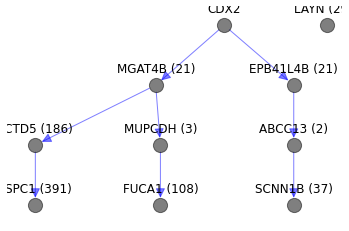

In [8]:

import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
attr_edge = []
vertices = ["CDX2"]
for k in cls2:
    vertices.append(k)
    if k in parent.keys():
        attr_edge.append([parent[k], k, {"type": 2}])
G = nx.DiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(attr_edge)
pos = graphviz_layout(G, prog='dot')
cm = {2: "b", 1: "g", 3: "r"}
colors = [cm[G[u][v]['type']] for u,v in G.edges()]
pos_higher = {}
labels = {}
for k, v in pos.items():
    pos_higher[k] = (v[0], v[1]+20)
for v in vertices:
    if(v not in labels):
        labels[v] = ""
    if v in cls2:
        labels[v] = v + " (" + str(len(cls2[v])) +")" 
    else:
        labels[v] = v
def ishold():
    return False
def hold(x):
    return False
def is_string_like(s):
    return isinstance(s, str)
def is_numlike(s):
    import numbers
    return isinstance(s, numbers.Number)
plt.ishold = ishold
plt.hold = hold
matplotlib.cbook.is_string_like = is_string_like
matplotlib.cbook.is_numlike = is_numlike

nx.draw_networkx_labels(G, pos_higher, labels)
nx.draw(G, pos, arrowsize=20, #arrowstyle="fancy",
        node_size=200, alpha=0.5, node_color="black", edge_color=colors)

print(" ".join(cls2.keys()), cls2['ABCC13'] )

In [9]:
cls2['ABCC13'] # both are eqv

['ABCC13', 'UGT1A6']

In [14]:
cls2

{'MGAT4B': ['MGAT4B',
  'C6orf136',
  'MYH14',
  'PLEKHG6',
  'ERBB2',
  'HDHD3',
  'GNA11',
  'PRSS8',
  'MYO1D',
  'KIAA0746',
  'PTPRF',
  'DOK4',
  'CAPN5',
  'CLDN3',
  'KIAA1543',
  'PRR15',
  'IHH',
  'AKAP1',
  'CEBPA',
  'ACVR1B',
  'ABP1'],
 'EPB41L4B': ['EPB41L4B',
  'F2RL1',
  'KCTD5',
  'TPD52',
  'SOS2',
  'POF1B',
  'CD164',
  'STX3',
  'TMEM9B',
  'NDRG2',
  'CXADR',
  'ABCD3',
  'RETSAT',
  'MAP7',
  'PRKAB1',
  'SLC44A4',
  'TMPRSS2',
  'CAT',
  'PDE8A',
  'RBM35A',
  'APPL2'],
 'KCTD5': ['KCTD5',
  'SLC35A2',
  'NFYC',
  'ZDHHC5',
  'PKP3',
  'POLDIP3',
  'INPP5A',
  'C21orf33',
  'RANGAP1',
  'CDH1',
  'MAX',
  'C19orf6',
  'DNAJC14',
  'MAZ',
  'WWP2',
  'STX3',
  'API5',
  'CTNND1',
  'MAP2K2',
  'FLOT1',
  'PVRL2',
  'UBE4B',
  'MRPL38',
  'COPE',
  'YKT6',
  'BSG',
  'MRPL4',
  'ZFYVE21',
  'KPNA1',
  'FH',
  'APH1A',
  'YWHAE',
  'DAPK3',
  'TSPAN31',
  'RBM14',
  'MPDU1',
  'F2RL1',
  'UNC93B1',
  'CXADR',
  'ARFRP1',
  'TMEM9B',
  'DNASE2',
  'SH3GLB2',
  'SL

Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
58 [30, 28] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[1]
[2]
[2]
[1]
[4]
[5]
[1]
[3]
[2]
[1]
[3]
[1]
[1]
[1]
[3]
[2]
[1]
[2]
[3]
[2]
[0]
[1]
[1]
[0]
[3]
[1]
[2]
[1]
[6]
[1]
[1]
[0]
[4]
[3]
[1]
[2]
[0]
[0]
[1]
[4]
[1]
[6]
[0]


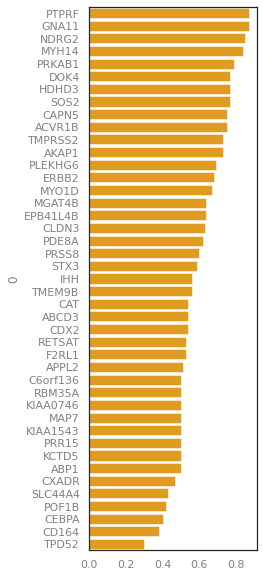

In [10]:
nodes = ['CDX2'] + cls2['EPB41L4B'] + cls2['MGAT4B']
ana = CRCDiffAnalysis()
ana.getQu2016(2)
res = []
for i in range(len(nodes)):
    wt1, lt1 = [-1], [[nodes[i]]]
    ana.orderData(lt1, wt1)
    #print("index = ", i, nodes[i], ana.getROCAUC())
    res += [[nodes[i], ana.getROCAUC()]]
df = pd.DataFrame(res)
df = df.sort_values(1, ascending=False)
# print(list(df.sort_values(1, ascending=False)[0])[0:5])
df.index = df[0]
df = df[[1]]
cfile = "Figs1-F.pdf"
pdf = bone.getPDF(cfile)
sns.set()
sns.set_style("white")
sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
sns.set_context("notebook")
sns.set_palette([bone.adj_light(c, 1.5, 1) for c in acolor])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,10))
sns.barplot(ax=ax, data=df.T, orient='h', color='orange', ci=None, linewidth=.5)
pdf.savefig(transparent=True, bbox_inches = 'tight')
bone.closePDF(pdf)

In [11]:
print(df.head(5).index)
df.head(5)

Index(['PTPRF', 'GNA11', 'NDRG2', 'MYH14', 'PRKAB1'], dtype='object', name=0)


,1
0,
PTPRF,0.87
GNA11,0.87
NDRG2,0.85
MYH14,0.84
PRKAB1,0.79


Qu 2016 Normal Adenoma Cancer (n = 58)
GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50
58 [30, 28] GSE77953 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=PLP50 PLP50
[18]
ROC-AUC 0.93
[9.019780882029826, 45.658018596946874, 8.519780882029826, 9.519780882029826]
0.920046934106826 9.939827816136653
Global 2018 GPL570 Colon Purged (n = 1911)
GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145
1832 [170, 1662] GEO CRC115 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC145 CRC145
[5]
ROC-AUC 0.68
[0.9772307028277453, 1065.1151681885608, 0.47723070282774527, 1.4772307028277454]
0.48033803131534303 1.4575687341430883
TCGA 2017 CRC mRNA (n = 698)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80
695 [51, 644] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC80 CRC80
[5]
ROC-AUC 0.90
[1.057738670799412, 258.137843755836, 0.5577386707994121, 1.557738670799412]
0.5518490678944117 1.6095877386938238
Skrzy

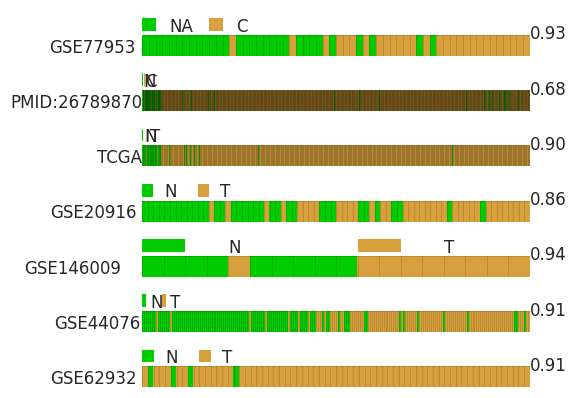

In [12]:
cfile = "Figs1-G.pdf"
pdf = bone.getPDF(cfile)
fig,axlist = plt.subplots(ncols=1, nrows=7, figsize=(5,5), dpi=100)
wt1, l1 = [-1], [['PTPRF', 'GNA11', 'NDRG2', 'MYH14', 'PRKAB1']]
ana = CRCDiffAnalysis()
ana.getQu2016(2)
def plotBar(ana, axlist, l1, wt1, n1):
    name=ana.h.getSource()
    if n1==1:
        name='PMID:26789870'
        
    c_dict, fpr, tpr, roc_auc = bone.processGeneGroups(ana, l1, wt1, fthr="thr2")
    params = {'spaceAnn': 10, 'tAnn': 2, 'widthAnn':2, 'acolor': acolor,
              'w': 5, 'h': 0.8, 'atypes': ana.atypes ,'cval': ana.cval, 'ax': axlist[n1]}
    ax = ana.printTitleBar(params)
    res = "%.2f" % roc_auc
    ax.text(len(ana.cval[0]), 4, res)
    ax.text(-1, 2, name, horizontalalignment='right',
            verticalalignment='center')
    return
plotBar(ana, axlist, l1, wt1, 0)
ana.getColonGEOPurged(2)
plotBar(ana, axlist, l1, wt1, 1)
ana.getTCGACRC(2)
plotBar(ana, axlist, l1, wt1, 2)
ana.getSkrzypczak2010(2) # use the latest version.
plotBar(ana, axlist, l1, wt1, 3)
ana.getParedes2020CRC(2, 0)
plotBar(ana, axlist, l1, wt1, 4)
ana.getSole2014(2)
plotBar(ana, axlist, l1, wt1, 5)
ana.getChen2016(2)
plotBar(ana, axlist, l1, wt1, 6)
pdf.savefig(transparent=True, bbox_inches = 'tight')
bone.closePDF(pdf)